# Task 1

## a)

### Softmax function :

Softmax is usually the last layer of the neural network. It;s used for classification of k classes. It converts the ouput from the last but one layer to a vector of probability distributions of k probabilities, relating the input feautre and the classes. The sum of its probabilities sum upto 1. The softmax is generally used as the output layer's activation function.   \\

The softmax function can be written as :

$$p_k = \dfrac{e^{f_k}}{\sum_{j} e^{f_j}} \; \; \; \; \; \; \; $$



### Negative Log Likelihood :

The negative log likelihood can be written as \\
$$ L(y) = - log(p_{y_i}) $$


While performing back propagation, we first compute the loss function(L) w.r.t the network(f), $\frac{\partial L_{i}}{\partial f_{k}}$ from the output layers. 

The loss function can we written as :

$$\dfrac{\partial L_i}{\partial f_k} = \dfrac{\partial L_i}{\partial p_k} \dfrac{\partial p_k}{\partial f_k} \; \; \; \; \; \; \; $$ since L is dependent on $p_k$, and p is dependent on $f_k$.

Now, we need to find out the values for $$\dfrac{\partial L_i}{\partial p_k}$$ and $$\dfrac{\partial p_k}{\partial f_k}$$

We know that, $$\dfrac{\partial L_i}{\partial p_k} = \frac{-1}{p_k} $$

Now, $$\dfrac{\partial p_k}{\partial f_k} = \dfrac{\partial}{\partial f_k} \left(\dfrac{e^{f_k}}{\sum_{j} e^{f_j}}\right)$$
$$\dfrac{\partial p_k}{\partial f_k} = \dfrac{e^{f_k}(\Sigma - e^{f_k})}{\Sigma^2}$$
$$\dfrac{\partial p_k}{\partial f_k} = \dfrac{e^{f_k}}{\Sigma} \dfrac{\Sigma - e^{f_k}}{\Sigma}$$ 
$$\dfrac{\partial p_k}{\partial f_k} = p_k * (1-p_k) \; \; \; \; \; \; \;$$

So, $$\frac{\partial L_{i}}{\partial f_{k}} = \frac{-1}{p_k}* p_k * (1-p_k)$$

=> $$\frac{\partial L_{i}}{\partial f_{k}} = (p_k-1)$$


Hence, we conclude that a neural	network	to	maximize	the	log	likelihood	of	label	is	one	that has softmax	 output	 nodes	 and	 minimizes the	 criterion	 function	 of	 the	 negative	 log probability.

## b)

The maximum a posterior estimation is $\text{arg max}_{\vec w} p(\mathcal D; \vec w)p(\vec w)$.\
$p(\vec w)$ is the prior distribution. \
Considering input/output pairs (x1,y1)....(xN,yN). The outputs are linearly correlated with the inputs via $\alpha$ and the noise is $ϵ$. \
$ y_{n} = \alpha x_{n} + ϵ $

The likelihood is:
$$\prod _{n=1}^{N}\mathbb{N}\left ( y_{n}|\alpha x_{n}, \sigma^{2} \right )$$

The prior is:
$$\mathbb{N}\left ( \alpha|0, \lambda^{-1}  \right )$$

We combine the prior and the likelihood to get the posterior probability distribution. \
The posterior is:
$$\prod _{n=1}^{N}\mathbb{N}\left ( y_{n}|\alpha x_{n}, \sigma^{2} \right ) \mathbb{N}\left ( \alpha|0, \lambda^{-1} \right )$$

Now we perform regularization on $\alpha$. Maximmising $\alpha$ gives maximum a-posterior estimate for $\alpha$. Since $\alpha$ is present in the prior term, combining that term to get the posterior and thereby making the posterior maximimum, proves that Gaussian Prior can be infered as the L2 Regularization term.

Taking log on the above expression gives : 

$$\sum _{n=1}^{N} - \frac{1}{\sigma^{2}}\left ( y_{n} - \alpha x_{n} \right )^{2} - \lambda \alpha^{2} + C,$$ 

# Task 2

In [4]:
import numpy as np
import keras
from keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils
from keras import regularizers
import matplotlib.pyplot as plt
from keras.callbacks import LambdaCallback

def createDatasets(X, Y, length):
    
    image_count = [0 for i in range(10)]

    x_new = []
    y_new = []

    for i, d in enumerate(Y):
        if image_count[d] == length:
            continue
        else:
            x_new.append(X[i])
            y_new.append(d)
            image_count[d] += 1
        
    return np.array(x_new), np.array(y_new)

In [5]:
def Accuracy(y_test, y_pred):
    y_test = y_test.reshape(y_pred.shape)
    total = 0
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            total += 1      
    accuracy = total / len(y_test)
    return accuracy*100

In [6]:
def SequentialModel(first_layer, middle_layer, final_layer, hidden_nodes, input_size, regularize, learning_rate, toRegularize):
    model = Sequential()
    if toRegularize:
        model.add(Dense(first_layer, activation='sigmoid', input_dim=image_size, kernel_regularizer = regularizers.l2(regularize)))
        for i in range(1, hidden_nodes):
            model.add(Dense(middle_layer, activation='sigmoid', kernel_regularizer = regularizers.l2(regularize)))
        model.add(Dense(final_layer, activation='softmax'))  
    else:
        model.add(Dense(first_layer, activation='sigmoid', input_dim=image_size))  
        for i in range(1, hidden_nodes):
            model.add(Dense(middle_layer, activation='sigmoid'))
        model.add(Dense(final_layer, activation='softmax'))
    sgd = SGD(learning_rate=learning_rate)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
  
    return model 

In [7]:
def ModelAccuracy(model, x_train, y_train, x_test, y_test, epochs, batch_size):

    layer_w = []
    weights = LambdaCallback(on_epoch_end=lambda epoch, logs: layer_w.append(model.layers[0].get_weights()))
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0, validation_data=(x_test, y_test), callbacks=[weights])
    loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=False)
    return accuracy, history, np.array(layer_w)

In [8]:
def plot(y, name, typeFig):
    plt.figure()
    plt.title("Variation of " + name + " with Epoch for " + typeFig )
    plt.plot(y)
    plt.ylabel(name)
    plt.xlabel('Epochs')
    plt.show()

def plotModelHistory(history, y1, y2, name):
    plt.figure()
    plt.plot(history.history[y1])
    plt.plot(history.history[y2])
    plt.title('Model Accuracy for ' + name)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Training Loss', 'Testing Loss'], loc = 'upper right')
    plt.show()

In [9]:
def LearningSpeed(weights):
    prev = 0 
    learntSpeed = []
    for ind, item in enumerate(weights):
        weights[ind] = np.mean(np.mean(weights[ind]))
    for w in weights:
        diff = w - prev
        learntSpeed.append(diff)
        prev = w
    Speed = np.array(learntSpeed)/np.sum(weights)
    
    return Speed

In [10]:
def displayAccuracies(accuracies):
    print ("\n\n")
    print("Hidden layers           Unregularized            Regularizer")
    
    for i in range(accuracies.shape[0]):
        print("    ",i+1,"                  ",'{0:.2f}'.format(accuracies[i][0]),"%               ",'{0:.2f}'.format(accuracies[i][1]),"%")
        print("\n")

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #initialize datasets
train_x, train_y = createDatasets(x_train, y_train, 100)
test_x, test_y = createDatasets(x_test, y_test, 100)
image_dim = 28
image_size = image_dim**2
num_Classes = 10
x_train = train_x.reshape(train_x.shape[0], image_size)
x_test = test_x.reshape(test_x.shape[0], image_size)
x_train = np.divide(x_train, 255)
x_test = np.divide(x_test, 255)
y_train = keras.utils.np_utils.to_categorical(train_y, num_Classes)
y_test = keras.utils.np_utils.to_categorical(test_y, num_Classes)
accuracies = np.zeros((3,2))
Lambda = 5
learning_rate = 0.1
epochs = 30
batch_size = 10
first_layer = 30
final_layer = 10

11501568/11490434 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys




Accuracy 84.79999899864197


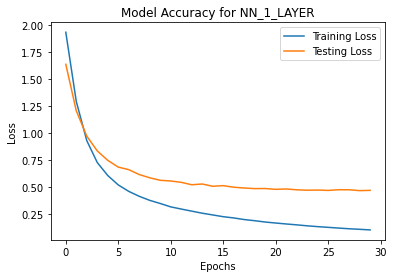

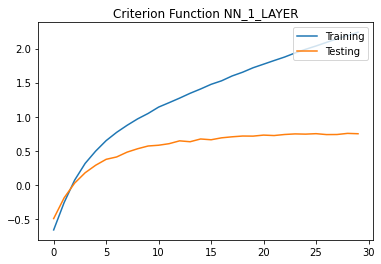

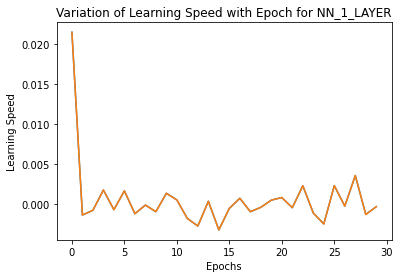

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys




Accuracy  16.899999976158142


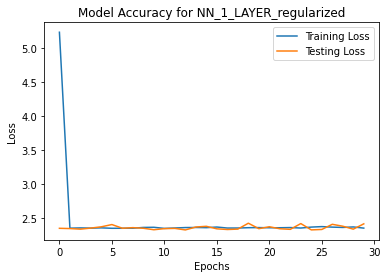

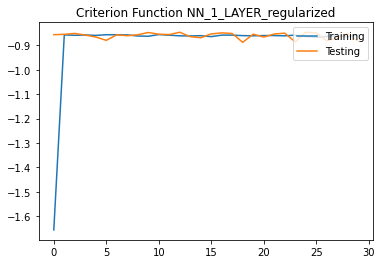

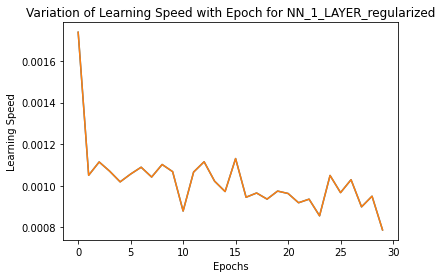

In [12]:
# nn with 1 hidden layer without regularization

model = SequentialModel(first_layer, 0, final_layer, 1, image_size, Lambda, learning_rate, False)

accuracies[0,0], history, w11 = ModelAccuracy(model, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy", accuracies[0,0]*100)
ls = LearningSpeed(w11)
plotModelHistory(history, 'loss', 'val_loss', 'NN_1_LAYER')
plt.plot(-np.log(history.history['loss']) , label='Training')
plt.plot(-np.log(history.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_1_LAYER")
plot(ls, 'Learning Speed', 'NN_1_LAYER')

# nn with 1 hidden layer and regularizer

reg_model = SequentialModel(first_layer, 0, final_layer, 1, image_size, Lambda, learning_rate, True)
accuracies[0,1], reg_history, w12= ModelAccuracy(reg_model, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy ", accuracies[0,1]*100)
ls = LearningSpeed(w12)
plotModelHistory(reg_history,'loss', 'val_loss', 'NN_1_LAYER_regularized')
plt.plot(-np.log(reg_history.history['loss']) , label='Training')
plt.plot(-np.log(reg_history.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_1_LAYER_regularized")
plot(ls, 'Learning Speed', 'NN_1_LAYER_regularized')



Accuracy 81.09999895095825


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


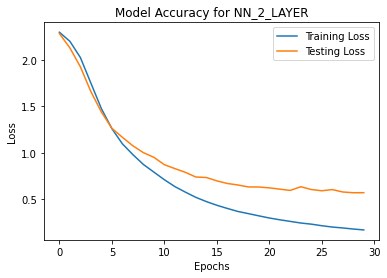

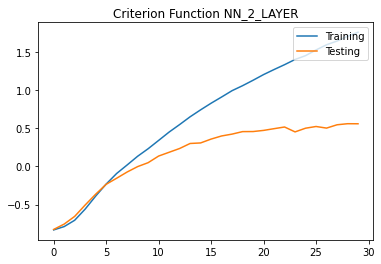

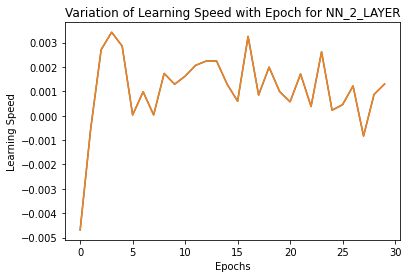


Accuracy 10.000000149011612


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


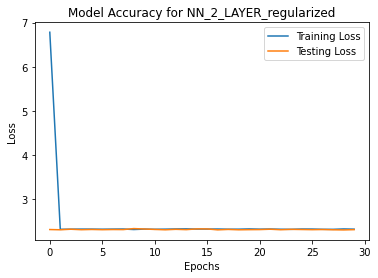

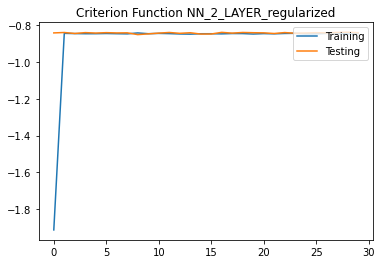

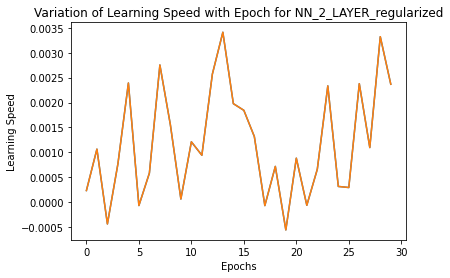

In [14]:
# nn with 2 hidden layers without regularizer

hidden_nodes = 2
middle_layers = 30

model_2 = SequentialModel(first_layer, middle_layers, final_layer, hidden_nodes, image_size, Lambda, learning_rate, False)
accuracies[1,0], history_2, w21= ModelAccuracy(model_2, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy", accuracies[1,0]*100)
ls = LearningSpeed(w21)
plotModelHistory(history_2, 'loss', 'val_loss', 'NN_2_LAYER')
plt.plot(-np.log(history_2.history['loss']) , label='Training')
plt.plot(-np.log(history_2.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_2_LAYER")
plot(ls, 'Learning Speed', 'NN_2_LAYER')

# nn with 2 layers and with regularizer
reg_model_2 = SequentialModel(first_layer, middle_layers, final_layer, hidden_nodes, image_size, Lambda, learning_rate, True)
accuracies[1,1], reg_history_2, w22 = ModelAccuracy(reg_model_2, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\nAccuracy", accuracies[1,1]*100)
ls = LearningSpeed(w22)
plotModelHistory(reg_history_2,'loss', 'val_loss', 'NN_2_LAYER_regularized')
plt.plot(-np.log(reg_history_2.history['loss']) , label='Training')
plt.plot(-np.log(reg_history_2.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_2_LAYER_regularized")
plot(ls, 'Learning Speed', 'NN_2_LAYER_regularized')



Accuracy 68.59999895095825


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


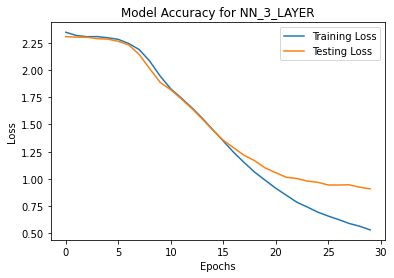

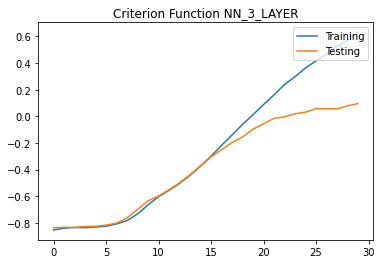

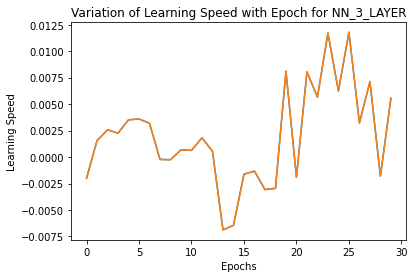



Accuracy 10.000000149011612


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  import sys


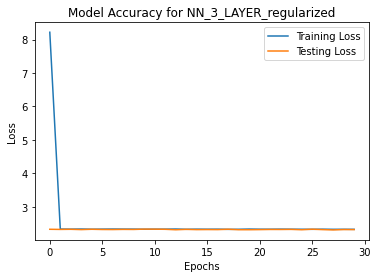

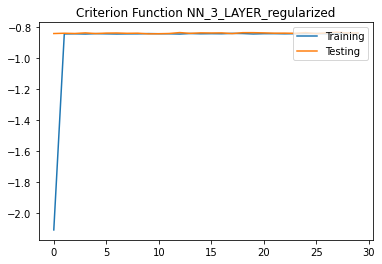

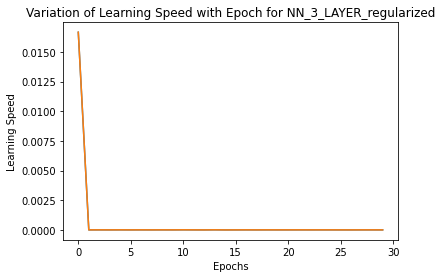

In [11]:
# nn with 3 layers without regularizer
hidden_nodes = 3
middle_layers = 30
model_3 = SequentialModel(first_layer, middle_layers, final_layer, hidden_nodes, image_size, Lambda, learning_rate, False)
accuracies[2,0], history_3, w31= ModelAccuracy(model_3, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy", accuracies[2,0]*100)
ls = LearningSpeed(w31)
plotModelHistory(history_3, 'loss', 'val_loss', 'NN_3_LAYER')
plt.plot(-np.log(history_3.history['loss']) , label='Training')
plt.plot(-np.log(history_3.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_3_LAYER")
plot(ls, 'Learning Speed', 'NN_3_LAYER')

# nn with 3 layers with regularizer
reg_model_3 = SequentialModel(first_layer, middle_layers, final_layer, hidden_nodes, image_size, Lambda, learning_rate, True)
accuracies[2,1], reg_history_3, w32 = ModelAccuracy(reg_model_3, x_train, y_train, x_test, y_test, epochs, batch_size)
print ("\n\nAccuracy", accuracies[2,1]*100)
ls = LearningSpeed(w32)
plotModelHistory(reg_history_3,'loss', 'val_loss', 'NN_3_LAYER_regularized')
plt.plot(-np.log(reg_history_3.history['loss']) , label='Training')
plt.plot(-np.log(reg_history_3.history['val_loss']), label='Testing')
plt.legend(loc = 'upper right')
plt.title("Criterion Function NN_3_LAYER_regularized")
plot(ls, 'Learning Speed', 'NN_3_LAYER_regularized')

## c)

In [15]:
from scipy.ndimage import rotate, shift
from keras.layers import Conv2D, Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [16]:
def rotateImg(image, degree):
    new_img = rotate(image, degree,(1,0), reshape=False)
    return new_img.reshape(image.shape[0], image.shape[1], 1)
def shiftImg(image, sequence):
    new_img = shift(image, sequence)
    return new_img.reshape(image.shape[0], image.shape[1], 1)
def augmentImages(x_dataset, y_dataset, degree, shift_pixels):
    augmented = []
    y_augmented = []
    for index, img in enumerate(x_dataset):
        for i in range(degree):
            deg = i-3
            rot_Img = rotateImg(img, deg)
            augmented.append(rot_Img)           
            y_rot_temp = keras.utils.np_utils.to_categorical(y_dataset[index], 10)
            y_augmented.append(y_rot_temp)            
        sh_Img = shiftImg(img, shift_pixels)
        augmented.append(sh_Img)
        y_sh_temp = keras.utils.np_utils.to_categorical(y_dataset[index], 10)
        y_augmented.append(y_sh_temp)           
    return np.array(augmented), np.array(y_augmented)
def CNNModel(cnn_inp_shape, num_Classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = cnn_inp_shape))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(num_Classes, activation='softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.1), metrics=['accuracy'])
    return model
    

In [17]:
shift_pixels = 3.0
degree = 2*4
x_train_augmented, y_train_augmented = augmentImages(train_x, train_y, degree, shift_pixels)
x_test_augmented, y_test_augmented = augmentImages(test_x, test_y, degree, shift_pixels)
cnn_inp_shape = (image_dim, image_dim, 1)
CNN_model = CNNModel(cnn_inp_shape, num_Classes)
X_train = train_x.reshape(train_x.shape[0], image_dim, image_dim, 1)
X_test = test_x.reshape(test_x.shape[0], image_dim, image_dim, 1)
CNN_model_augmented = CNN_model.fit(x_train_augmented, y_train_augmented, batch_size=batch_size, epochs=epochs, verbose=False, validation_data=(x_test_augmented, y_test_augmented))
cnn_loss, cnn_accuracy_augmented = CNN_model.evaluate(x_test_augmented, y_test_augmented, verbose=0)
print ("\n Accuracy: ", cnn_accuracy_augmented*100,"%")



Augmented accuracy:  10.000000149011612 %


References :
1. Pattern classification book by Duda, Hart and Stork.
2. Keras documentation : https://faroit.com/keras-docs/1.2.0/, https://keras.io/
3. Tensorflow documentation : https://www.tensorflow.org/api_docs, https://www.tensorflow.org/api_docs/python/tf
4. Class slides
